# 1 Exploratory Data Analysis(EDA):

In [2]:
# importing libraries for data analysis
import pandas as pd                                # data manipulation
import numpy as np                                 # faster computing
import matplotlib.pyplot as plt                    # data visualization
import seaborn as sns                              # improved data visualization

import warnings                                    # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset and checking a sample of the dataset
data = pd.read_csv('../Dataset/predictive_maintenance.csv',index_col=0)
data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Dataset Description:   
* The dataset consists of 1 categorical feature along with 5 numerical features and 2 target variables.   
* The categorical feature represents the Type of the problem which gives information about the quality about the product.  
* The numerical features contain discrete values representing the properties of the product while the product is actively used.  
* The first target variable represents whether the product is going to fail or not.   
* The second target variable represents the type of failure occuring in the product.

### 1.1 Checking for missing values:

In [7]:
# checking properties of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 781.2+ KB


There are no missing values in our dataset.

### 1.2 Checking for Duplicate Data:

In [4]:
data.duplicated().any()

False

There are no duplicated data.

In [3]:
data['Product ID'].unique()  ,  data['Product ID'].nunique()

(array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
       dtype=object),
 10000)

All the values of the feature Product ID are unique. Hence, it is not of use for training a model for classification and we drop that column.

In [3]:
#removing the unnecessary feature
data = data.drop(labels=['Product ID'], axis=1)

### 1.3 Descriptive Statistics:

In [9]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
data['Type'].unique()  ,  data['Type'].nunique() 

(array(['M', 'L', 'H'], dtype=object), 3)

### 1.4 Visualizing the distribution of each feature

Text(0.5, 0.98, 'Distribution of data among types of product')

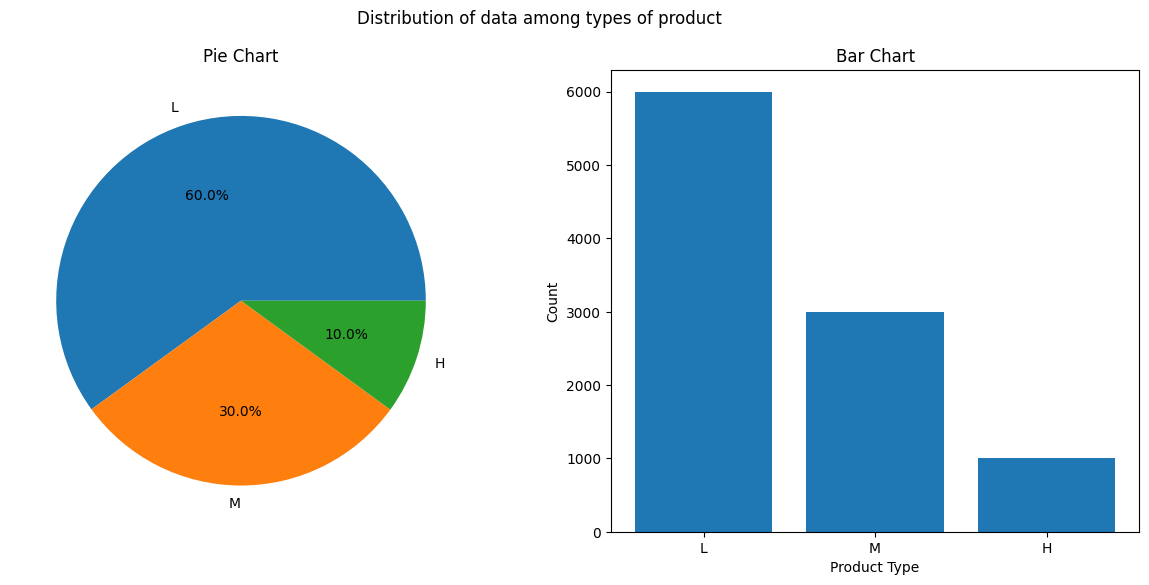

In [16]:
# visualizing the distribution of product types in our dataset
count = data['Type'].value_counts()
fig ,(axs1 , axs2) = plt.subplots(1,2,figsize=(15,6))
axs1.pie(count.values,labels=count.keys(),autopct="%1.1f%%")
axs1.set_title('Pie Chart')
axs2.bar(x= count.keys(),height=count.values)
axs2.set_title('Bar Chart')
axs2.set_xlabel('Product Type')
axs2.set_ylabel('Count')
fig.suptitle('Distribution of data among types of product')


Text(0.5, 0.98, 'Distribution of the data')

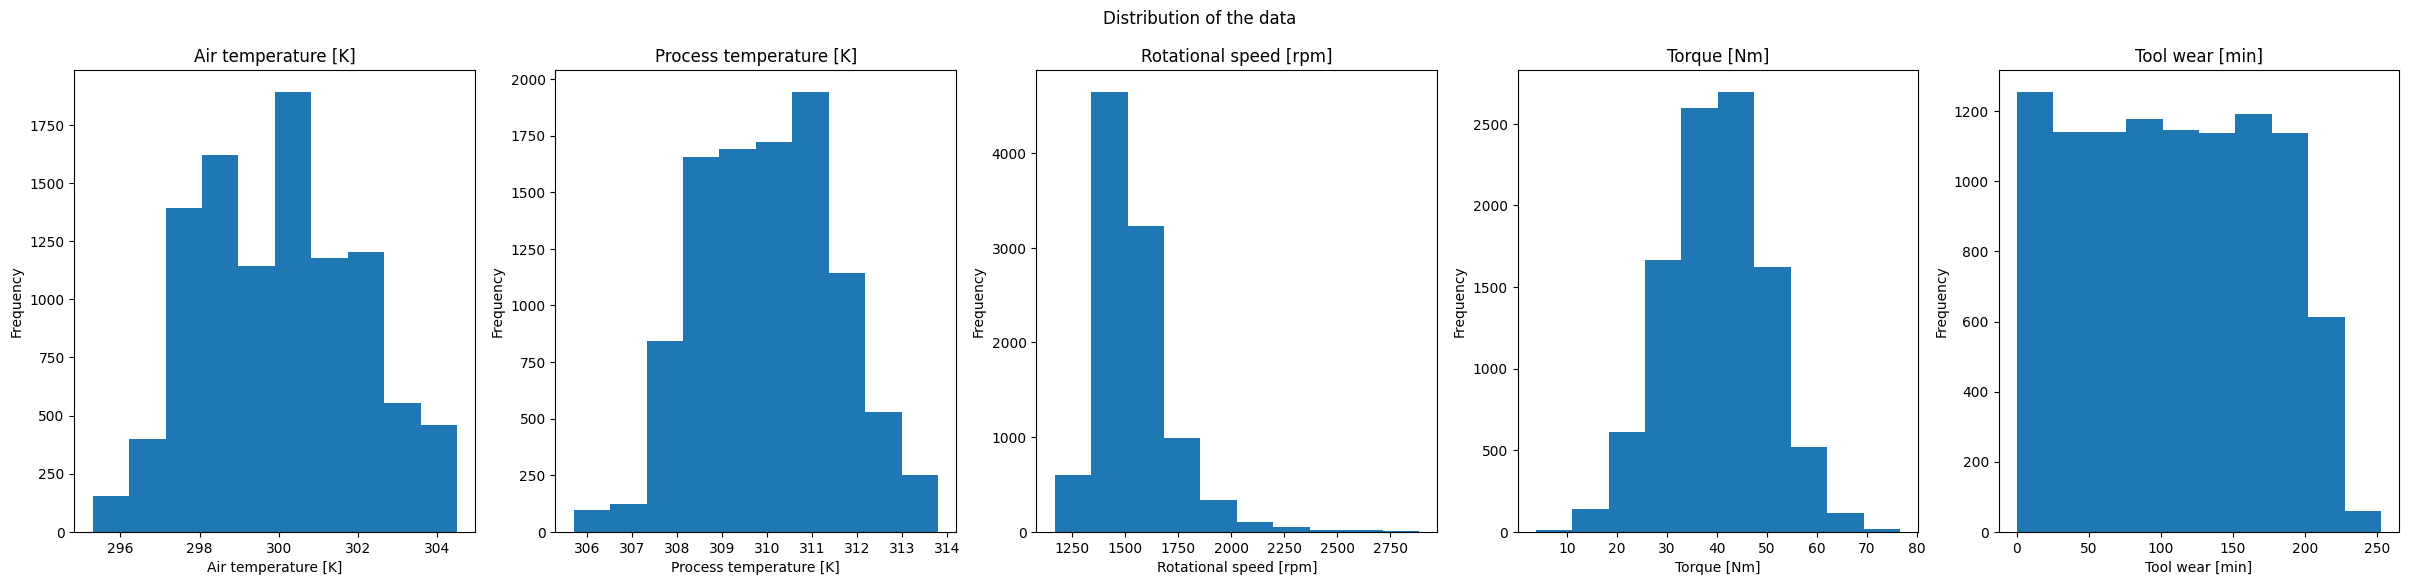

In [20]:
fig , axes = plt.subplots(1,5,figsize=(30,6))

for i,axs in enumerate(axes):
    i = i+1
    axs.hist(data.iloc[:,i])
    axs.set_title(data.columns[i])
    axs.set_xlabel(data.columns[i])
    axs.set_ylabel('Frequency')
fig.suptitle('Distribution of the data')

Text(0.5, 0.98, 'Boxplot of numerical features in the data')

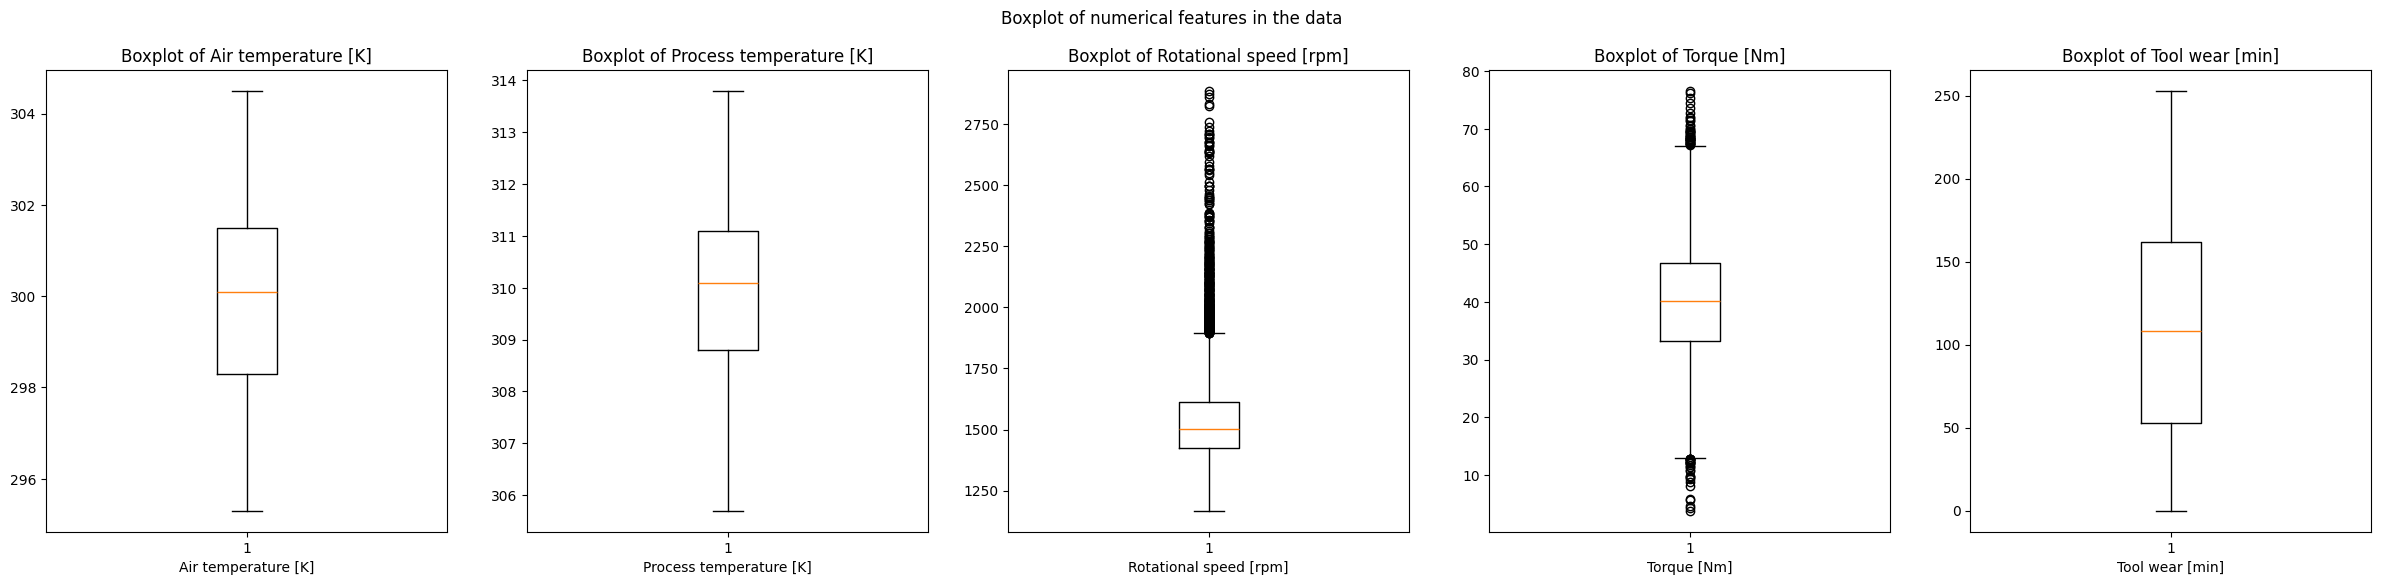

In [24]:
fig , axes = plt.subplots(1,5,figsize=(30,6))

for i,axs in enumerate(axes):
    i = i+1
    axs.boxplot(data.iloc[:,i])
    axs.set_title(f'Boxplot of {data.columns[i]}')
    axs.set_xlabel(data.columns[i])
fig.suptitle('Boxplot of numerical features in the data')

Looks like there are a lot of outliers in the Rotational speed and Torque features and rest of the data is outlier free.

In [6]:
data['Target'].unique() , data['Target'].nunique() , data['Failure Type'].unique() , data['Failure Type'].nunique()

(array([0, 1], dtype=int64),
 2,
 array(['No Failure', 'Power Failure', 'Tool Wear Failure',
        'Overstrain Failure', 'Random Failures',
        'Heat Dissipation Failure'], dtype=object),
 6)

Text(0.5, 0.98, 'Distribution of Target')

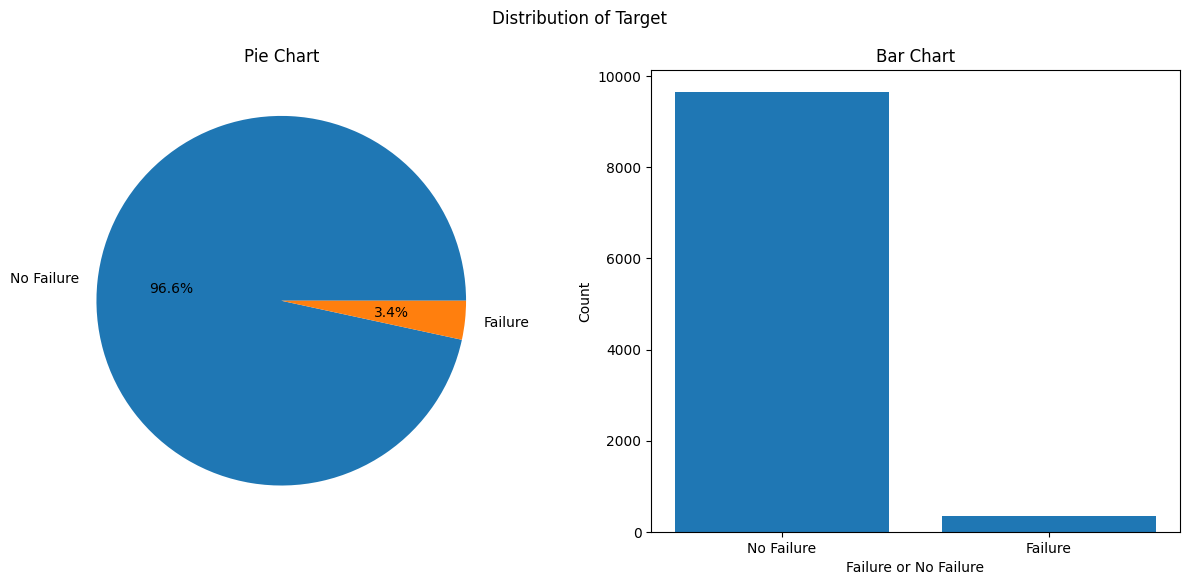

In [17]:
# visualizing the distribution of Target Failure or no failure in our dataset
count = data['Target'].value_counts()
fig , (axs1 , axs2) = plt.subplots(1,2,figsize=(15,6))
axs1.pie(count.values,labels=['No Failure', 'Failure'],autopct="%1.1f%%")
axs1.set_title('Pie Chart')
axs2.bar(x= ['No Failure','Failure'],height=count.values)
axs2.set_title('Bar Chart')
axs2.set_xlabel('Failure or No Failure')
axs2.set_ylabel('Count')
fig.suptitle('Distribution of Target')

Text(0.5, 0.98, 'Distribution of Failure Types')

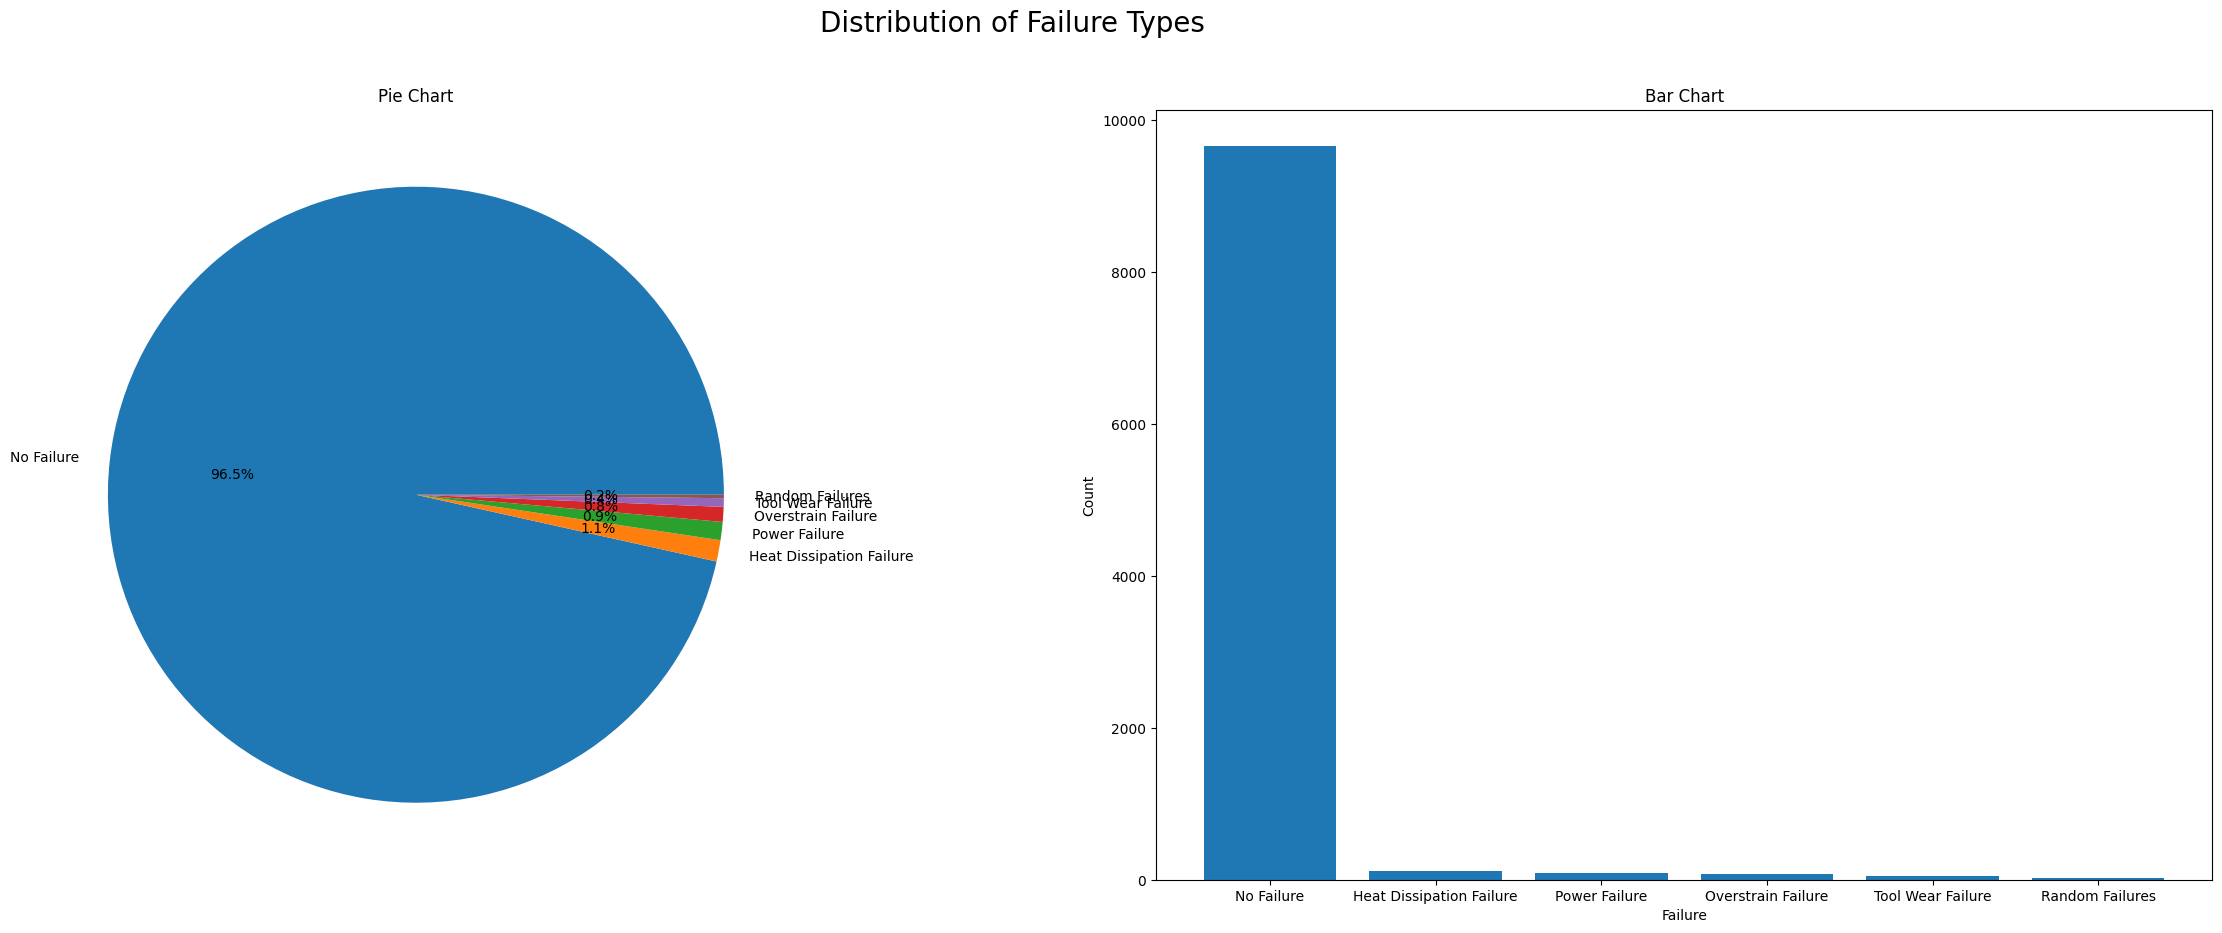

In [31]:
# visualizing the distribution of Failure Types in our dataset
count = data['Failure Type'].value_counts()
fig , (axs1 , axs2) = plt.subplots(1,2,figsize=(30,10))
axs1.pie(count.values,labels=count.keys(),autopct="%1.1f%%")
axs1.set_title('Pie Chart')
axs2.bar(x= count.keys(),height=count.values)
axs2.set_title('Bar Chart')
axs2.set_xlabel('Failure Type')
axs2.set_ylabel('Count')
fig.suptitle('Distribution of Failure Types',fontsize=20)

As we can see there is huge class imbalance present in our dataset.

In this scenario, oversampling the minority classes might produce misleading data as they have very low data and it is not sufficient to train an oversampler like smote effectively. We can go with undersampling.

### 1.5 Checking for Correlation between Features:

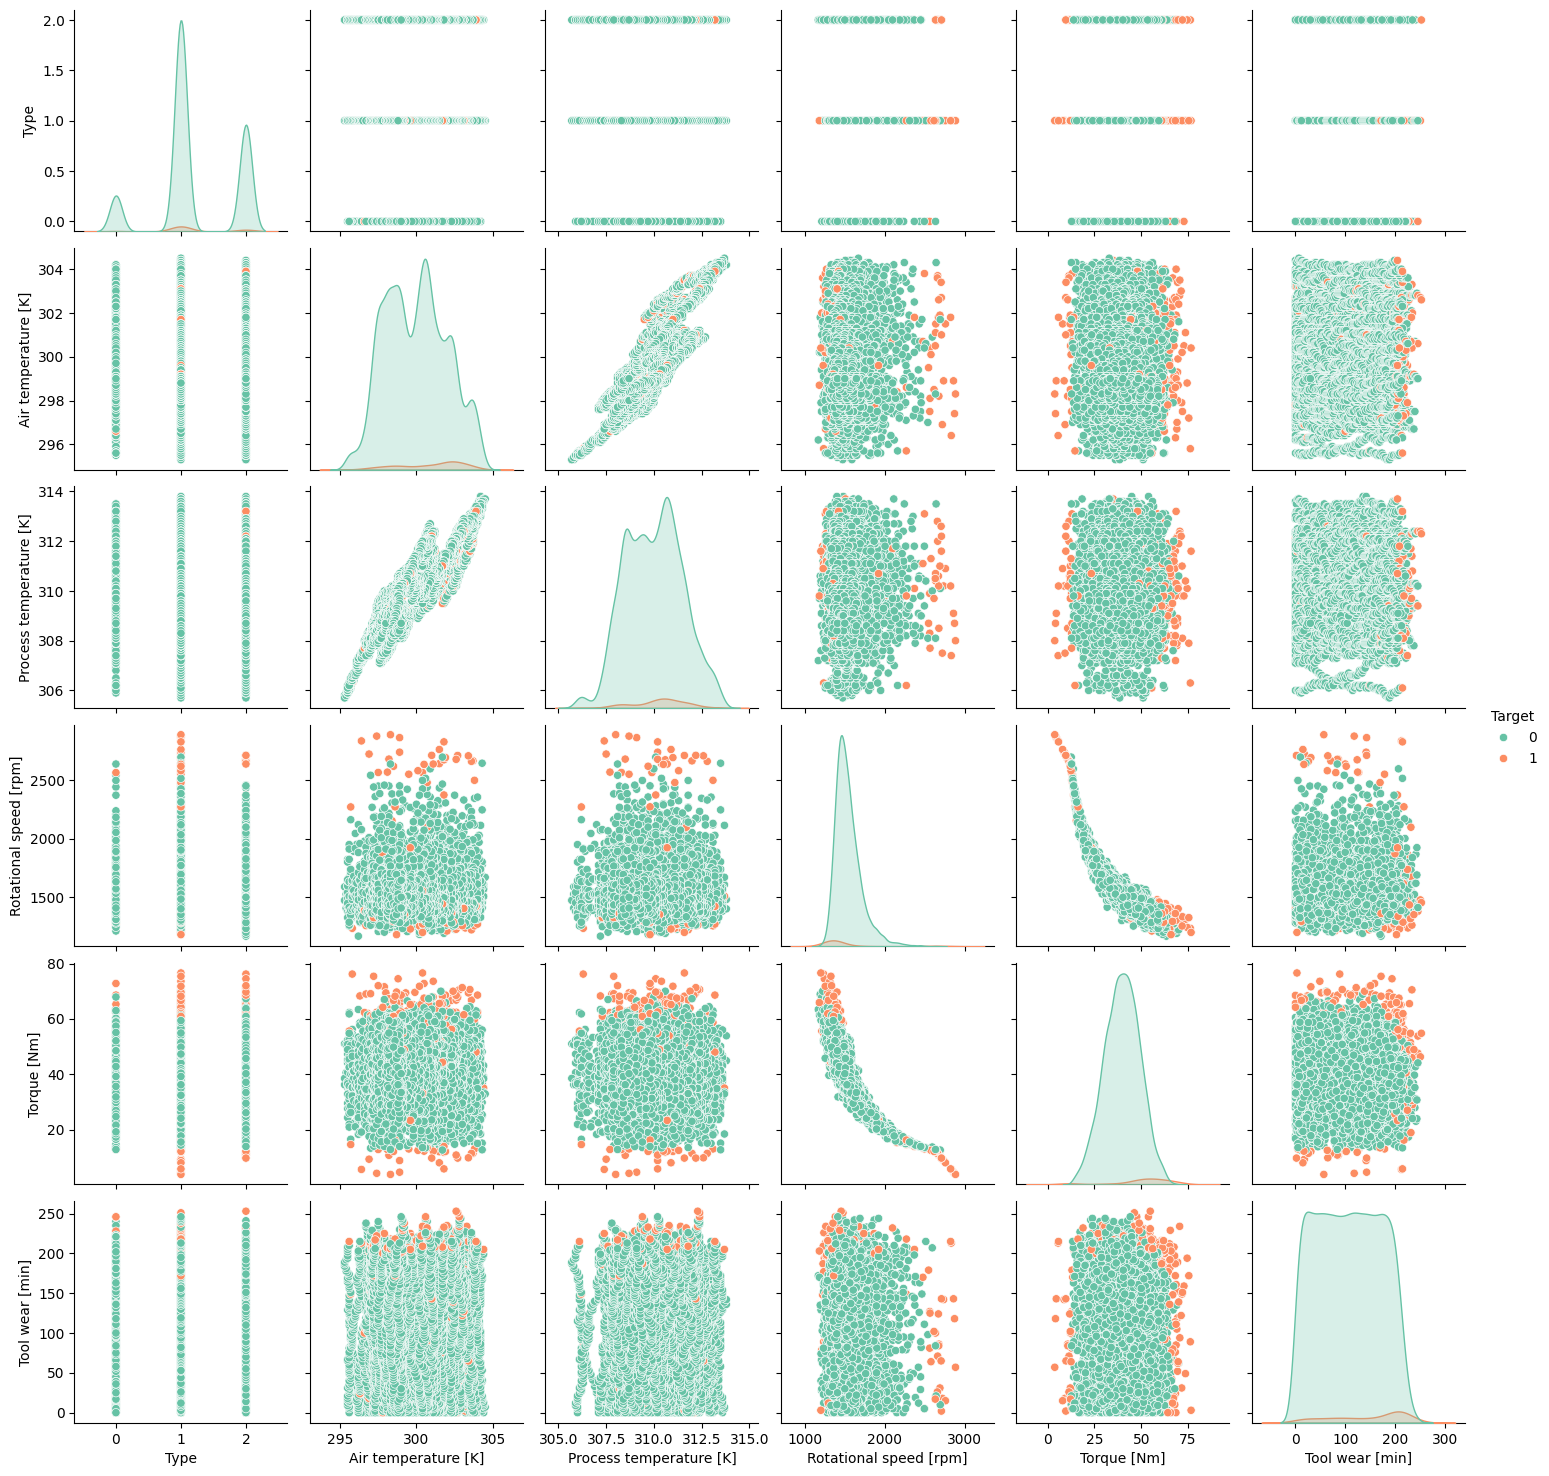

In [16]:
# visualizing the correlation between each feature in our dataset
sns.pairplot(data.iloc[:,:-1], hue='Target',palette='Set2')               

In [50]:
data.iloc[:,1:7].corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


There are no major correlations between the features. Hence, we can procees and leverage all features for machine learning.

# 2 Data Cleaning:

### 2.1 Eliminating Misleading Data:

In [5]:
# if the target is 0 and the same row has a failure type, then it is misleading
misleading_data1 = data[(data['Target'] == 0) & (data['Failure Type'] != 'No Failure')]

# if the target is 1 and the failure type is no failure, then the data is again misleading
misleading_data2 = data[(data['Target'] == 1) & (data['Failure Type'] == 'No Failure')]

# combining the both dataframes 
misleading_data = pd.concat([misleading_data1, misleading_data2],axis=0)
print(misleading_data.shape)
misleading_data.head()

(27, 8)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1222,M,297.0,308.3,1399,46.4,132,0,Random Failures
1303,L,298.6,309.8,1505,45.7,144,0,Random Failures
1749,H,298.4,307.7,1626,31.1,166,0,Random Failures
2073,L,299.6,309.5,1570,35.5,189,0,Random Failures
2560,L,299.3,309.0,1447,50.4,140,0,Random Failures


In [6]:
data.drop(misleading_data.index, inplace=True)
data.shape

(9973, 8)

We have removed 27 misleading rows

### 2.2 Dealing with Outliers:

In the data visualization section, we visualised the boxplot of all numerical features and we noticed the existence of outliers in two features. In this section we remove these outliers from out dataset. 

In [7]:
# Leveraging Inter Quartile Range Model to return the existing outliers in our dataset
outliers_df = []
for i in data.iloc[:,1:6]:                                      # for each feature in our dataset
    col = data[i]
    # Calculating interquartile range (IQR)
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1

    # Identifying potential outliers (values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
    outliers = col[(col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR))]

    # Returns outliers (if any)
    if outliers.size > 0:
        print(f'{len(outliers)} outliers detected in {i} feature.')
        outliers_df.append(outliers)
    else:
        print(f"No outliers detected in {i}.")

outliers_df = pd.DataFrame(outliers_df).T
print(f'Total outliers: {outliers_df.shape[0]}')

No outliers detected in Air temperature [K].
No outliers detected in Process temperature [K].
418 outliers detected in Rotational speed [rpm] feature.
70 outliers detected in Torque [Nm] feature.
No outliers detected in Tool wear [min].
Total outliers: 460


In [8]:
outliers_df.head()

,Rotational speed [rpm],Torque [Nm]
UDI,,
15,2035.0,NaN
51,2861.0,4.6
71,1924.0,NaN
102,1991.0,NaN
156,1987.0,NaN


In [9]:
data.drop(outliers_df.index, inplace=True)             # removing the outliers from our data
data.shape

(9513, 8)

We have successfully removed the 460 outliers out of our dataset.

# 3. Data Preprocessing:

The values of the features Type and Failure type are in string format but for training a model we need to data in numericals, so we encode then into numbers.

### Feature Encoding:

In [10]:
from sklearn.preprocessing import OrdinalEncoder                         # importing the encoder module 

encoder = OrdinalEncoder()
data['Type'] = encoder.fit_transform(data[['Type']])                     # creating an instance of the encoder
data['Failure Type'] = encoder.fit_transform(data[['Failure Type']])     # fitting the undersampler and resampling the data

In [11]:
#removing spaces in the column names as models like xgboost and lightgbm return errors when the input has column names with special characters.
data.columns = ['Type', 'Air_Temp', 'Process_Temp', 'Rotational_Speed', 'Torque', 'Tool_Wear', 'Target', 'Failure_Type']

Splitting the features and target variables.

In [12]:
X = data.drop(['Failure_Type','Target'], axis=1)                         # features 
Y1 = data['Target']                                                      # 1st Target Variable 
Y2 = data['Failure_Type']                                                # 2nd Target Variable 

### Undersampling:

In [13]:
from imblearn.under_sampling import TomekLinks                     # importing the undersampler module 

undersampler = TomekLinks(sampling_strategy='majority')            # creating an instance of the undersampler
X_resampled, Y_resampled = undersampler.fit_resample(X,Y1)         # fitting the undersampler and resampling the data

Splitting the data into train and test data.

In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X, Y1,test_size=0.2,random_state=42) # the answer to the universe 

# 4. Machine Learning:

Model Selection:  
Since the data is structured and less, machine learning models perform better than deep learning. Specifically Boosting techniques like XtremeGBM and LightGBM.

We have a binary clssification with the target and multi class classification with the failure type.  
* For Failure prediction, we implement Logistic regression and an ensemble technique.  
* For failure type prediction, we leverage ensemble boosting techniques like lightgbm and xgboost.

## Failure Prediction:

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgm
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, auc, roc_curve, confusion_matrix

### Logistic Regression:

In [27]:
model = LogisticRegression( 
    penalty='l2')                             # l2 regularization to avoid overfitting

model.fit(x_train, y_train)                   # training the model 

y_pred_logistic = model.predict(x_test)                     # predicting the results for test data
print(accuracy_score(y_test, y_pred_logistic))              # printing the accuracy
print(classification_report(y_test, y_pred_logistic))       # printing the classification report

0.9753021544929059
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1854
           1       0.62      0.10      0.18        49

    accuracy                           0.98      1903
   macro avg       0.80      0.55      0.58      1903
weighted avg       0.97      0.98      0.97      1903



### Random Forest:

In [33]:
model = RandomForestClassifier(
    n_estimators=100,                   # number of trees 
    criterion='gini')                   # criterion for splitting

model.fit(x_train, y_train)             # training the model 

y_pred_rf = model.predict(x_test)                   # predicting the results for test data
print(accuracy_score(y_test, y_pred_rf))            # printing the accuracy
print(classification_report(y_test, y_pred_rf))     # printing the classification report

0.9900157645822386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1854
           1       0.94      0.65      0.77        49

    accuracy                           0.99      1903
   macro avg       0.97      0.83      0.88      1903
weighted avg       0.99      0.99      0.99      1903



In [34]:
# caluclating the roc and auc metrics 
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)
fpr_random_forest, tpr_random_forest, thresholds_random_forest = roc_curve(y_test, y_pred_rf)
auc_logistic = roc_auc_score(y_test, y_pred_logistic)
auc_random_forest = roc_auc_score(y_test, y_pred_rf)

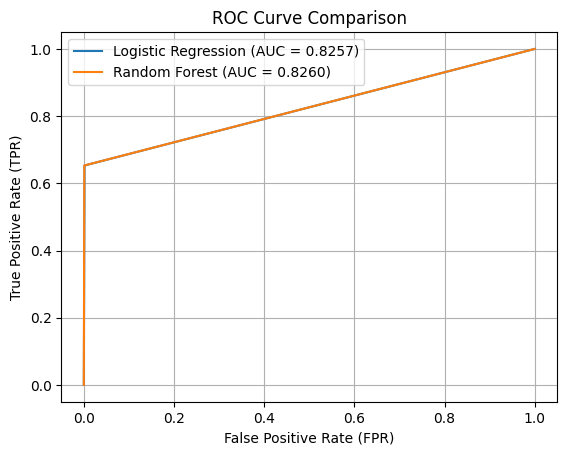

In [35]:
# visualizing the roc curve
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.4f)' % auc_logistic)
plt.plot(fpr_random_forest, tpr_random_forest, label='Random Forest (AUC = %0.4f)' % auc_random_forest)

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.grid(True)

Both models have similar curves.

## Failure Type Prediction:

Undersampling the data:

In [36]:
from imblearn.under_sampling import TomekLinks

undersampler = TomekLinks(sampling_strategy='majority')
X_resamples, Y_resampled = undersampler.fit_resample(X,Y2)


Splitting the data into train and test sets

In [37]:
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(X_resamples, Y_resampled,test_size=0.2,random_state=42)

### LightGBM:

In [52]:
model = lgm.LGBMClassifier(device_type='gpu',       #leveraging GPU acceleration for faster training
                       n_estimators=100,            #number of trees in the forest
                       max_depth=-1,                #maximum depth of the tree
                       learning_rate=0.1,           #learning rate
                       reg_alpha=0.1,               #L1 regularization penalty to restrict the model from overfitting
                       reg_lambda=1,                #L2 regularization penalty to restrict the model from overfitting
                       n_jobs=-1,                   #number of jobs to run in parallel
                       metric='multi_logloss',      #metric to optimize
                       )
model.fit(x_train, y_train)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 7542, number of used features: 6
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 6 dense feature groups (0.06 MB) transferred to GPU in 0.000499 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -4.450906
[LightGBM] [Info] Start training from score -0.028512
[LightGBM] [Info] Start training from score -4.801108
[LightGBM] [Info] Start training from score -5.632406
[LightGBM] [Info] Start training from score -5.372895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMClassifier(device_type='gpu', metric='multi_logloss', n_jobs=-1,
               reg_alpha=0.1, reg_lambda=1)

In [53]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9920466595970308
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91        23
         1.0       0.99      1.00      1.00      1840
         2.0       0.85      0.79      0.81        14
         3.0       0.67      0.67      0.67         3
         4.0       0.00      0.00      0.00         6

    accuracy                           0.99      1886
   macro avg       0.69      0.66      0.68      1886
weighted avg       0.99      0.99      0.99      1886



### XGBoost:

In [58]:
model = xgb.XGBClassifier(device = 'cuda',
                      max_depth=0,
                      eval_metric = 'mlogloss',
                      learning_rate=0.1,
                      n_estimators=100,
                      reg_alpha = 0,
                      reg_lambda = 1,
                    )
model.fit(x_train, y_train,verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=0,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9909862142099682
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        23
         1.0       0.99      1.00      1.00      1840
         2.0       0.86      0.86      0.86        14
         3.0       0.33      0.67      0.44         3
         4.0       0.00      0.00      0.00         6

    accuracy                           0.99      1886
   macro avg       0.64      0.68      0.65      1886
weighted avg       0.99      0.99      0.99      1886

